Develop a program to implement the Naive Bayesian classifier considering
Olivetti Face Data set for training. Compute the accuracy of the classifier, considering a
few test data sets.

In [1]:
!pip install scikit-learn

In [4]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
mat_data_path=("/content/olivettifaces.mat")
mat_data= scipy.io.loadmat(mat_data_path)

In [6]:
faces= mat_data["faces"]
num_sample= faces.shape[1]

In [8]:
X=faces.T

In [12]:
y=np.array([i//10 for i in range(num_sample)])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.2)

In [15]:
nb_classifier= GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [16]:
y_pred = nb_classifier.predict(X_test)

In [20]:
accuracy= accuracy_score(y_test, y_pred)
print(f"Acurracy: {accuracy*100:.2f}%\n")

Acurracy: 87.50%



In [21]:
print("classification report:", classification_report(y_test, y_pred, zero_division=0))

classification report:               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       0.50      0.50      0.50         2
          10       1.00      0.50      0.67         2
          11       1.00      1.00      1.00         2
          12       0.67      1.00      0.80         2
          13       1.00      0.50      0.67         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
    

In [22]:
conf_matrix= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


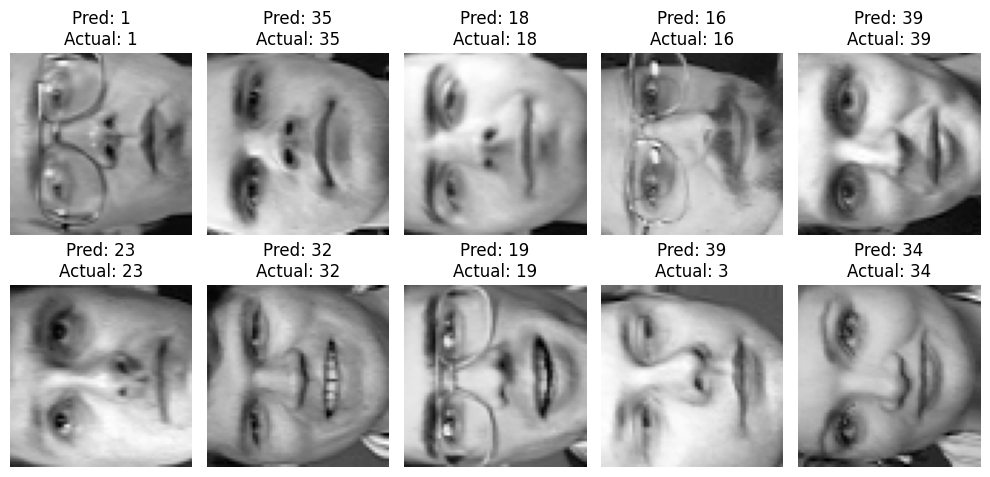

In [24]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(10):
  axes[i].imshow(X_test[i].reshape(64, 64), cmap='gray')
  axes[i].set_title(f"Pred: {y_pred[i]}\nActual: {y_test[i]}")
  axes[i].axis('off')
plt.tight_layout()
plt.show()